## Module 6.1.4

In [4]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longtitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [6]:
# Import citipy module
from citipy import citipy

In [7]:
# Add the latitudes and longtitudes to a list
coordinates = list(lat_lngs)
coordinates

[(81.76457438770879, 177.20028015152167),
 (33.112301591367455, 69.74883962701898),
 (35.91239443715969, 136.6174327073751),
 (-45.26554012303517, -7.433690600334103),
 (-54.165070878256614, -82.78292739352565),
 (-21.259137708114295, -16.27009365896103),
 (78.62935923708523, -73.29638044734499),
 (25.7681466114568, -148.4297861398095),
 (58.43962760421502, -47.02773336317148),
 (-53.28407860979099, 34.975682364716164),
 (-30.657630732128226, 124.59602495813334),
 (88.74028291796006, -43.85963474146686),
 (27.347718696267123, 129.11105888271294),
 (-53.899107982882285, -97.6369208994138),
 (77.27462885936944, 58.95918689957526),
 (-26.951351707620567, -132.92190839291573),
 (3.754245857108387, 173.83208876456888),
 (68.7170689552994, 62.80520554623834),
 (21.05170356454778, 177.62572372100556),
 (-43.95166528555984, -159.35176211552385),
 (45.18308074268225, -39.833158636722715),
 (-35.26119934793321, -148.7247003371991),
 (-16.008490078218344, 134.93948852726106),
 (-51.85947443687236

In [8]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient number of cities in the list
len(cities)

595

In [9]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key


In [10]:
# Starting URL for weather Map API call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c971f9fb98ac4976add5f0dfe44be1aa


In [11]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "sitka"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c971f9fb98ac4976add5f0dfe44be1aa&q=sitka


## Module 6.2.6

In [12]:
# Import the time library and the datefime module from the datetime library
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginnof of the logging
print("Beginning Data Retrieval       ")
print ("------------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval       
------------------------------


In [16]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        # Parse the json and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to SIO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    #Error check
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
    
# Indicate loading is complete
print("-------------------------")
print("Data Retrieval Complete  ")
print("-------------------------")

Processing Record 1 of Set 1 | leningradskiy
Processing Record 2 of Set 1 | khowst
Processing Record 3 of Set 1 | ono
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | amderma
'coord'
City not found. Skipping...
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | komsomolskiy
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | ngukurr
'coord'
City not found. Skipping...
Processing Record 23 of Set 1 

'coord'
City not found. Skipping...
Processing Record 38 of Set 4 | praya
Processing Record 39 of Set 4 | buraydah
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | paris
Processing Record 43 of Set 4 | alcaniz
Processing Record 44 of Set 4 | marystown
Processing Record 45 of Set 4 | geresk
'coord'
City not found. Skipping...
Processing Record 46 of Set 4 | akyab
Processing Record 47 of Set 4 | moranbah
Processing Record 48 of Set 4 | chokurdakh
Processing Record 49 of Set 4 | opuwo
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | atambua
Processing Record 2 of Set 5 | ligayan
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | mocuba
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | lakes entrance
Processing Record 7 of Set 5 | roald
Processing Record 8 of Set 5 | baddomalhi
Processing Record 9 of Set 5 | tikrit
Processing Record 10 of Set 5 | san fr

Processing Record 24 of Set 8 | gat
Processing Record 25 of Set 8 | saint anthony
Processing Record 26 of Set 8 | bogovina
Processing Record 27 of Set 8 | kezmarok
Processing Record 28 of Set 8 | ancud
Processing Record 29 of Set 8 | hays
Processing Record 30 of Set 8 | los chiles
Processing Record 31 of Set 8 | marabba
Processing Record 32 of Set 8 | patpata
'coord'
City not found. Skipping...
Processing Record 33 of Set 8 | oyama
Processing Record 34 of Set 8 | porto novo
Processing Record 35 of Set 8 | ilo
Processing Record 36 of Set 8 | stoyba
'coord'
City not found. Skipping...
Processing Record 37 of Set 8 | talgar
Processing Record 38 of Set 8 | rabaul
Processing Record 39 of Set 8 | chernyshevskiy
Processing Record 40 of Set 8 | penticton
Processing Record 41 of Set 8 | sechura
Processing Record 42 of Set 8 | krasnyy chikoy
Processing Record 43 of Set 8 | batemans bay
Processing Record 44 of Set 8 | boa vista
Processing Record 45 of Set 8 | karkaralinsk
'coord'
City not found. 

'coord'
City not found. Skipping...
Processing Record 6 of Set 12 | sibolga
Processing Record 7 of Set 12 | nuevo progreso
Processing Record 8 of Set 12 | hat yai
Processing Record 9 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 10 of Set 12 | tirumullaivasal
Processing Record 11 of Set 12 | ebano
'coord'
City not found. Skipping...
Processing Record 12 of Set 12 | salinopolis
Processing Record 13 of Set 12 | pajapan
Processing Record 14 of Set 12 | moree
Processing Record 15 of Set 12 | fairmont
Processing Record 16 of Set 12 | valparaiso
Processing Record 17 of Set 12 | tanabe
Processing Record 18 of Set 12 | faizpur
Processing Record 19 of Set 12 | grand gaube
Processing Record 20 of Set 12 | novoagansk
Processing Record 21 of Set 12 | fernandez
Processing Record 22 of Set 12 | sorland
Processing Record 23 of Set 12 | belaya gora
Processing Record 24 of Set 12 | meyungs
'coord'
City not found. Skipping...
Processing Record 25 of Set 12 | holmestrand
Processing Record 26 of

In [17]:
# Print the city count to confirm sufficient number of cities in the list
len(city_data)

540

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leningradskiy,69.3833,178.4167,-29.24,100,65,0.54,RU,2023-01-16 01:02:15
1,Khowst,33.3833,69.8833,32.40,14,0,6.02,AF,2023-01-16 01:02:16
2,Ono,34.8500,134.9333,48.90,78,100,12.75,JP,2023-01-16 01:02:17
3,Saldanha,-33.0117,17.9442,64.22,87,5,8.46,ZA,2023-01-16 01:02:17
4,Punta Arenas,-53.1500,-70.9167,53.71,62,0,28.77,CL,2023-01-16 00:58:26
5,Jamestown,42.0970,-79.2353,24.03,71,0,3.44,US,2023-01-16 01:01:33
6,Qaanaaq,77.4840,-69.3632,-7.51,61,24,7.07,GL,2023-01-16 01:02:18
7,Hilo,19.7297,-155.0900,78.24,79,36,7.00,US,2023-01-16 01:00:11
8,Nanortalik,60.1432,-45.2371,21.61,76,100,31.12,GL,2023-01-16 01:02:19
9,Port Alfred,-33.5906,26.8910,69.19,92,100,16.96,ZA,2023-01-16 01:02:20


In [19]:
# Reorder results of table to reade Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leningradskiy,RU,2023-01-16 01:02:15,69.3833,178.4167,-29.24,100,65,0.54
1,Khowst,AF,2023-01-16 01:02:16,33.3833,69.8833,32.40,14,0,6.02
2,Ono,JP,2023-01-16 01:02:17,34.8500,134.9333,48.90,78,100,12.75
3,Saldanha,ZA,2023-01-16 01:02:17,-33.0117,17.9442,64.22,87,5,8.46
4,Punta Arenas,CL,2023-01-16 00:58:26,-53.1500,-70.9167,53.71,62,0,28.77
5,Jamestown,US,2023-01-16 01:01:33,42.0970,-79.2353,24.03,71,0,3.44
6,Qaanaaq,GL,2023-01-16 01:02:18,77.4840,-69.3632,-7.51,61,24,7.07
7,Hilo,US,2023-01-16 01:00:11,19.7297,-155.0900,78.24,79,36,7.00
8,Nanortalik,GL,2023-01-16 01:02:19,60.1432,-45.2371,21.61,76,100,31.12
9,Port Alfred,ZA,2023-01-16 01:02:20,-33.5906,26.8910,69.19,92,100,16.96


In [20]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Module 6.3.1 Plotting Data for school project

In [23]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


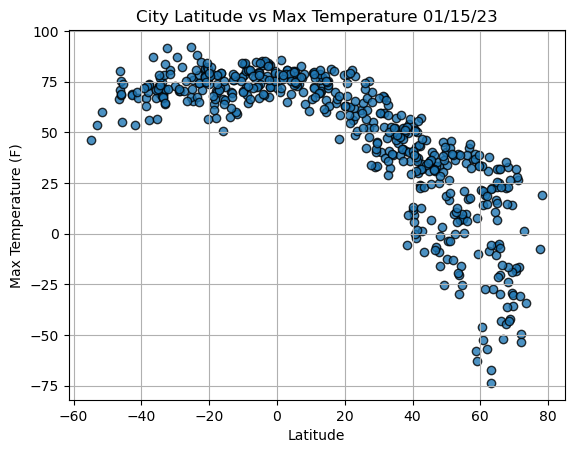

In [26]:
# Import the time module to set date and time
import time
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1_maxTemp.png")

# Show plot
plt.show()


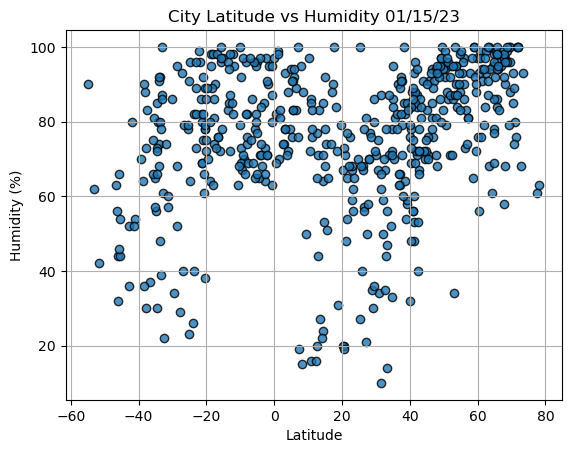

In [27]:
# Build the scatter plot for latitude vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2_humidity.png")

# Show plot
plt.show()

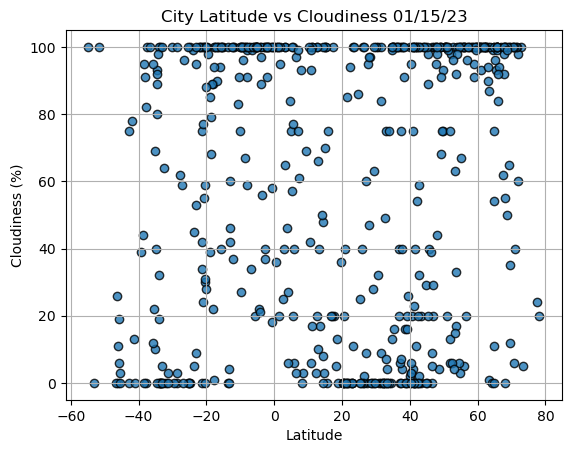

In [28]:
# Build the scatter plot for latitude vs Cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3_cloudiness.png")

# Show plot
plt.show()

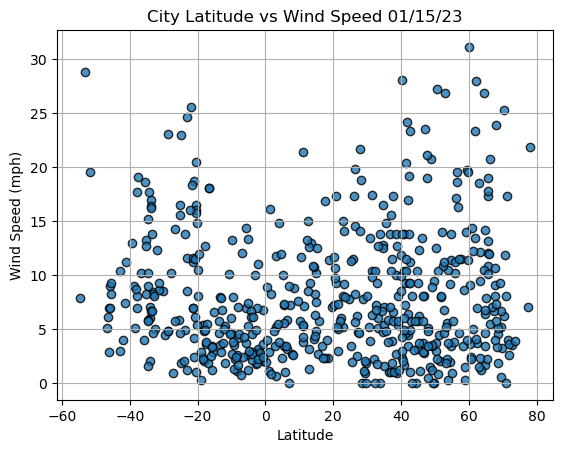

In [29]:
# Build the scatter plot for latitude vs Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4_windSpeed.png")

# Show plot
plt.show()